# Exploratory Data Analysis on Housing Dataset

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Loading the Dataset
df = pd.read_csv('./data/housing.csv', header=None, sep='\s+',
                 names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
                        'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
                        'LSTAT', 'MEDV'])

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
# Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [4]:
# Data processing
df.isnull().sum()  # Check for missing values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Visualization

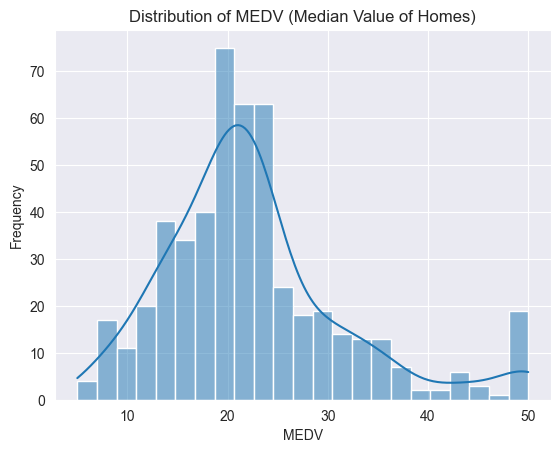

In [5]:
# Distribution of Target Variable
sns.histplot(df['MEDV'], kde=True)
plt.title('Distribution of MEDV (Median Value of Homes)')
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.show()

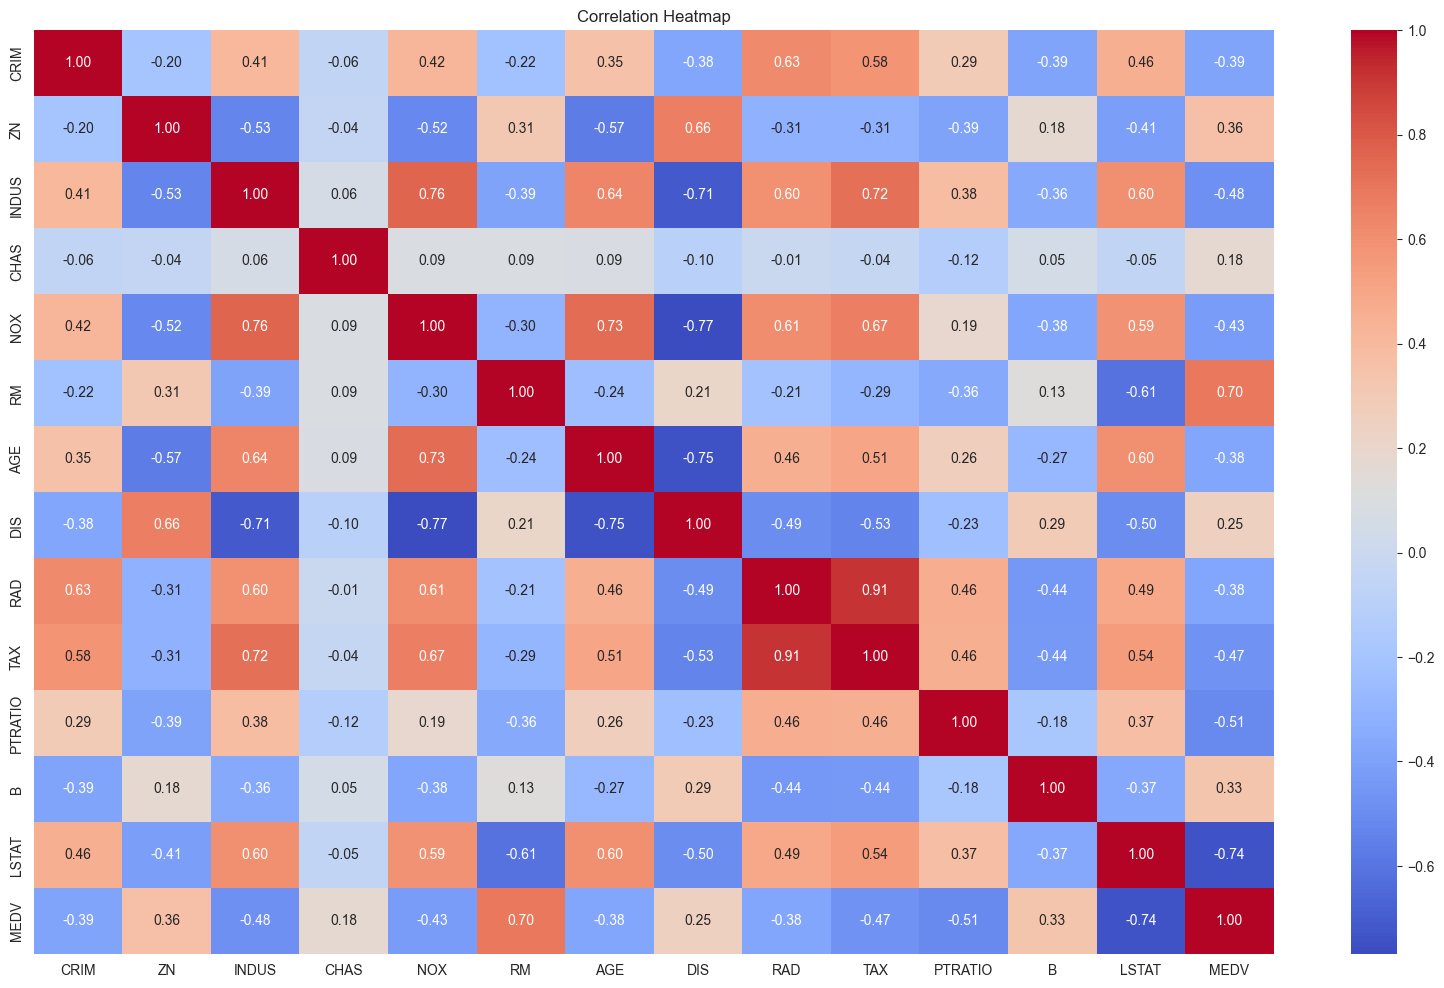

In [6]:
# Correlation Heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [7]:
# Features selection
X = df.drop('MEDV', axis=1)
y = df['MEDV']

X = sm.add_constant(X)  # Adding a constant for the intercept term

In [8]:
# Linear Regression Model
model = sm.OLS(y, X).fit()
# Model Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 25 Jul 2025   Prob (F-statistic):          6.72e-135
Time:                        16:53:46   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

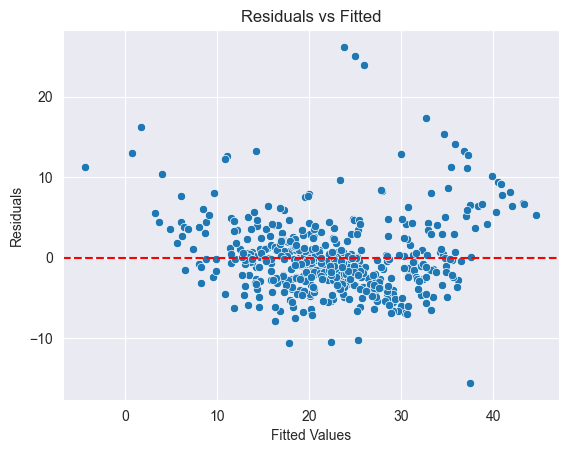

In [9]:
# Diagnostics
residuals = model.resid
fitted = model.fittedvalues

# Residuals vs Fitted Plot
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

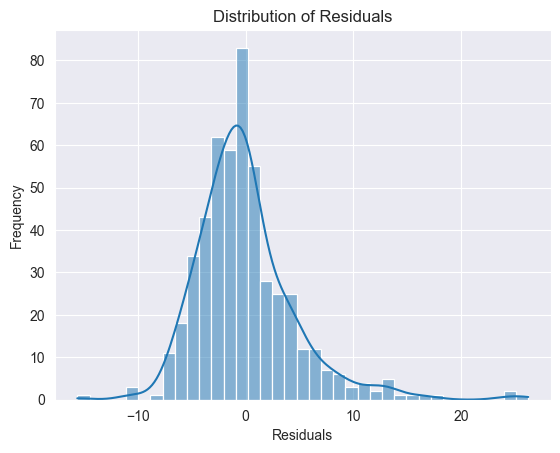

In [10]:
# Histplots and Q-Q Plot of Residuals
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

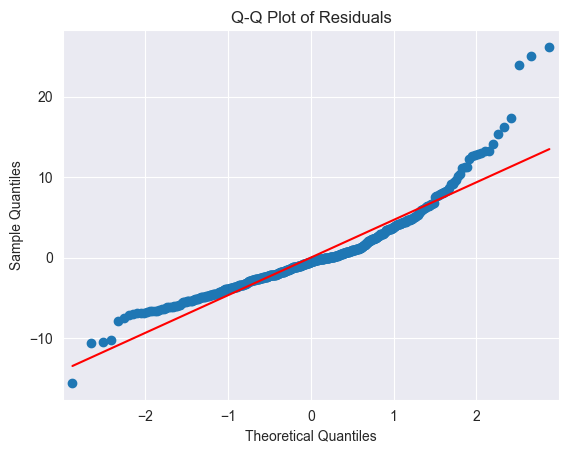

In [11]:
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [12]:
# Correction of the model
y = np.log(y)  # Log transformation of target variable

# Re-fitting the model
model_corrected = sm.OLS(y, X).fit()
# Model Summary
print(model_corrected.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     142.1
Date:                Fri, 25 Jul 2025   Prob (F-statistic):          4.07e-157
Time:                        16:54:08   Log-Likelihood:                 129.61
No. Observations:                 506   AIC:                            -231.2
Df Residuals:                     492   BIC:                            -172.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1020      0.204     20.081      0.0

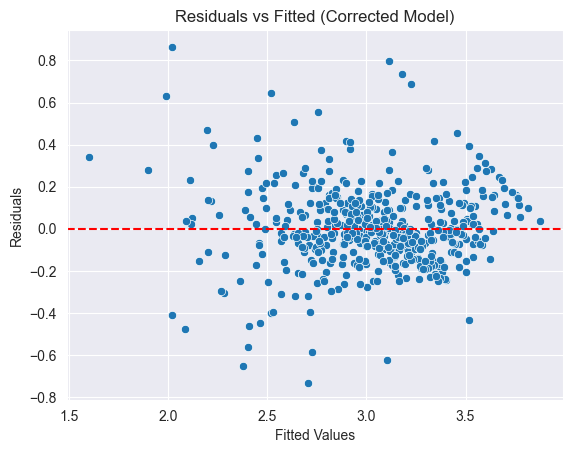

In [13]:
# Study of the residuals
residuals_corrected = model_corrected.resid
fitted_corrected = model_corrected.fittedvalues

# Residuals vs Fitted Plot
sns.scatterplot(x=fitted_corrected, y=residuals_corrected)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted (Corrected Model)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

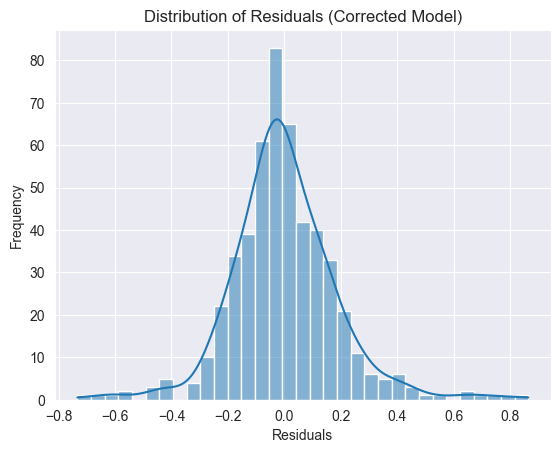

In [14]:
# Histplots and Q-Q Plot of Residuals
sns.histplot(residuals_corrected, kde=True)
plt.title('Distribution of Residuals (Corrected Model)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

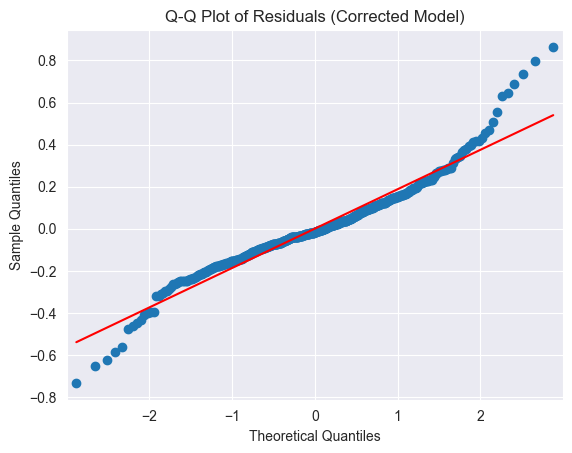

In [15]:
sm.qqplot(residuals_corrected, line='s')
plt.title('Q-Q Plot of Residuals (Corrected Model)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [17]:
# implementing a simple linear regression model using scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Building the model
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
# Predictions
y_pred = model_sklearn.predict(X_test)

In [21]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.03955201596531997
R^2 Score: 0.7462724975382748
